# Investment Assignment

# Checkpoint 1: Data Cleaning 1


In [3]:
#Loading the companies and rounds data

import numpy as np
import pandas as pd

companies = pd.read_csv('companies.csv')
rounds2 = pd.read_csv('rounds2.csv')

In [4]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [5]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [6]:
#Observation : duplicates of company names found with change in the letter case 

In [7]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In [8]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [9]:
#checking for number of unique company names in rounds2
rounds2.company_permalink.value_counts()

/ORGANIZATION/SOLARFLARE                                  10
/organization/tigo-energy                                  9
/ORGANIZATION/SEMPRIUS                                     9
/organization/vocalocity                                   9
/organization/semprius                                     9
                                                          ..
/organization/university-of-north-carolina-chapel-hill     1
/ORGANIZATION/ARMOUR-IO-INC                                1
/ORGANIZATION/STYLES-COM-BD                                1
/ORGANIZATION/FUZE-NETWORK                                 1
/organization/flypaper                                     1
Name: company_permalink, Length: 90247, dtype: int64

In [10]:
#checking for number of unique company names in companies
#assumption: all company names listed are unique in companies data file, no duplicates
companies.permalink.value_counts()

/Organization/Smartc2-Inc                         1
/Organization/Theblogtv                           1
/Organization/Photosecure                         1
/Organization/Dizzywood                           1
/Organization/Vitalsguard                         1
                                                 ..
/Organization/Inmatech                            1
/Organization/Al-Detal-Comercio-Social-Digital    1
/Organization/Snapp                               1
/Organization/Koala-Databank                      1
/Organization/Mia-Com                             1
Name: permalink, Length: 66368, dtype: int64

In [11]:
#Observation : The encoding is not correct
# Checking for correct encoding using chardet library

import chardet

with open("rounds2.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))

# check what the character encoding might be
print(result)

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


In [12]:
#importing data with correct encoding 'ISO-8859-1'
rounds2 = pd.read_csv('rounds2.csv', encoding = 'ISO-8859-1')
companies = pd.read_csv('companies.csv', encoding = 'ISO-8859-1')

In [13]:
#changing the letter case to lower to eliminate duplicate values by using lower() method to eliminte duplicates
rounds2.company_permalink = rounds2.company_permalink.str.lower()
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [14]:
#checking for number of unique company names in rounds2 dataframe by using unique() method
len(rounds2.company_permalink.unique())

66370

In [15]:
#changing the letter case to lower for correct merging of databy using lower() method to eliminte duplicates
companies.permalink = companies.permalink.str.lower()
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [16]:
#checking for number of unique company names in companies dataframe by using unique() method
len(companies.permalink.unique())

66368

In [17]:
#Merge the two data frames rounds2 and companies into master_frame dataframe
master_frame = rounds2.merge(companies, how = 'left', left_on = 'company_permalink', right_on = 'permalink')
master_frame.head()


,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [18]:
#Number of observations in master_frame dataframe
master_frame.shape

(114949, 16)

In [19]:
#Checking for unmatched rows after merging
master_frame[master_frame.permalink.isna()]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
29597,/organization/e-cãbica,/funding-round/8491f74869e4fe8ba9c378394f8fbdea,seed,NaN,01-02-2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31863,/organization/energystone-games-çµç³æ¸¸æ,/funding-round/b89553f3d2279c5683ae93f45a21cfe0,seed,NaN,09-08-2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45176,/organization/huizuche-com-æ ç§ÿè½¦,/funding-round/8f8a32dbeeb0f831a78702f83af78a36,seed,NaN,18-09-2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58473,/organization/magnet-tech-ç£ç³ç§æ,/funding-round/8fc91fbb32bc95e97f151dd0cb4166bf,seed,NaN,16-08-2014,1625585.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101036,/organization/tipcat-interactive-æ²èÿä¿¡æ¯ç...,/funding-round/41005928a1439cb2d706a43cb661f60f,seed,NaN,06-09-2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109969,/organization/weiche-tech-åè½¦ç§æ,/funding-round/f74e457f838b81fa0b29649740f186d8,venture,A,06-09-2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113839,/organization/zengame-ç¦ æ¸¸ç§æ,/funding-round/6ba28fb4f3eadf5a9c6c81bc5dde6cdf,seed,NaN,17-07-2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# Observation : all the above companies are available in companies data but with a slight change in a single character in the name. 

#The below 2 companies are the reason for more company names in the round2 data. 
#These companies have appeared with 2 variants of names in the rounds2 data.

# 58473 /organization/magnet-tech-ç£ç³ç§æ
# 109969 /organization/weiche-tech-åè½¦ç§æ


# Checkpoint 2: Funding Type Analysis

In [21]:
#Checking for different funding round types using value_counts() method
master_frame.funding_round_type.value_counts()

venture                  55494
seed                     30524
debt_financing            6895
angel                     6094
undisclosed               4897
equity_crowdfunding       3257
private_equity            2285
grant                     2200
convertible_note          1817
post_ipo_equity            638
product_crowdfunding       410
non_equity_assistance      191
post_ipo_debt              152
secondary_market            95
Name: funding_round_type, dtype: int64

In [22]:
#Filtering the data with 4 funding round types 'venture', 'angel', 'seed', 'private_equity'
master_frame = master_frame[master_frame.funding_round_type.isin(['venture','angel','seed','private_equity'])]
master_frame.funding_round_type.value_counts()

venture           55494
seed              30524
angel              6094
private_equity     2285
Name: funding_round_type, dtype: int64

In [23]:
master_frame.shape

(94397, 16)

In [24]:
#Removing rows with no investment amount values in the dataframe
master_frame = master_frame[~master_frame.raised_amount_usd.isna()]
master_frame.shape

(80627, 16)

In [25]:
#checking the number of investments funding type wise after removal of nulls
master_frame.funding_round_type.value_counts()

venture           50228
seed              23603
angel              4860
private_equity     1936
Name: funding_round_type, dtype: int64

In [26]:
#Removing redundant rows from the dataframe
master_frame.drop(['funding_round_permalink', 'funding_round_code', 'funded_at', 'permalink', 'homepage_url',
                  'state_code', 'region', 'city', 'founded_at'], axis = 1, inplace = True)
master_frame.shape

(80627, 7)

In [27]:
#importing libraries for plotting and ignoring the warnings
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [28]:
#Analysing the spread of invested amount by grouping the data based on funding type
master_frame.groupby("funding_round_type")['raised_amount_usd'].describe()

,count,mean,std,min,25%,50%,75%,max
funding_round_type,,,,,,,,
angel,4860.0,9.586945e+05,7.404397e+06,0.0,150000.00,400000.0,1000000.0,4.945120e+08
private_equity,1936.0,7.330859e+07,1.981135e+08,0.0,5000000.00,20000000.0,75000000.0,4.745460e+09
seed,23603.0,7.198180e+05,2.221733e+06,0.0,55000.00,275000.0,1000000.0,2.000000e+08
venture,50228.0,1.174895e+07,8.635207e+07,0.0,1600901.75,5000000.0,12000000.0,1.760000e+10


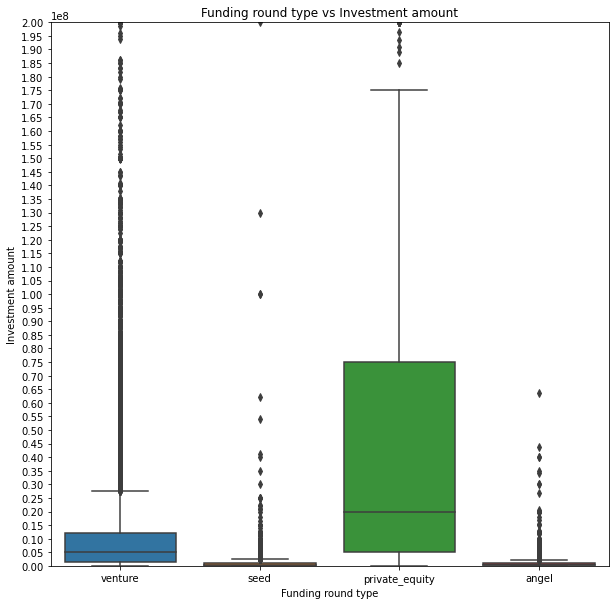

In [33]:
# Boxplot of invested amount grouped by funding type
plt.figure(figsize= (10,10))
ax = sns.boxplot(data = master_frame, x = 'funding_round_type', y = 'raised_amount_usd')
plt.ylim(0, 200000000)
y_ticks = np.linspace(0, 200000000, 41)
plt.yticks(y_ticks)
ax.set(xlabel='Funding round type', ylabel='Investment amount', title = 'Funding round type vs Investment amount')
plt.show()

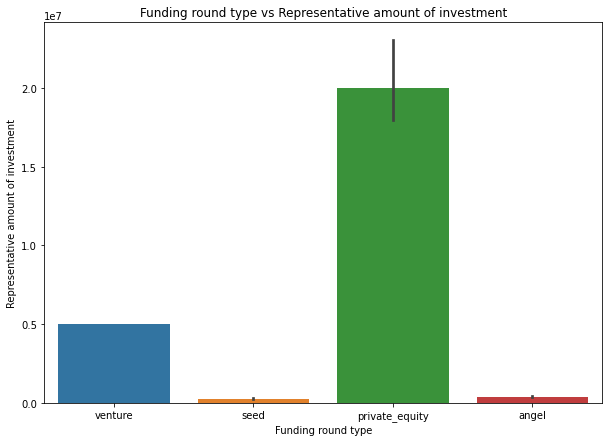

In [34]:
#plot showing the representative amount of investment in each funding type
plt.figure(figsize= (10,7))
ax = sns.barplot(data = master_frame, x = 'funding_round_type', y = 'raised_amount_usd', estimator = np.median)
ax.set(xlabel='Funding round type', ylabel='Representative amount of investment', title = 'Funding round type vs Representative amount of investment')
plt.show()

In [35]:
#Function to remove outliers from the data based on IQR formula
def remove_outliers(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    df=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    return df

In [36]:
#Removing the outliers from the data based on funding type and analysing the spread of data 
for i in ['angel','private_equity','seed','venture']:
    df = master_frame[master_frame.funding_round_type == i]
    df = remove_outliers(df)
    print(f'{i} : {df.raised_amount_usd.describe()}\n')
    

angel : count    4.542000e+03
mean     5.333313e+05
std      5.150989e+05
min      0.000000e+00
25%      1.422922e+05
50%      3.500000e+05
75%      7.589502e+05
max      2.265394e+06
Name: raised_amount_usd, dtype: float64

private_equity : count    1.757000e+03
mean     3.495788e+07
std      4.105932e+07
min      0.000000e+00
25%      4.710000e+06
50%      1.500000e+07
75%      5.500000e+07
max      1.750000e+08
Name: raised_amount_usd, dtype: float64

seed : count    2.228300e+04
mean     5.005461e+05
std      5.792809e+05
min      0.000000e+00
25%      5.000000e+04
50%      2.500000e+05
75%      7.782875e+05
max      2.414850e+06
Name: raised_amount_usd, dtype: float64

venture : count    4.590400e+04
mean     6.430618e+06
std      6.383885e+06
min      0.000000e+00
25%      1.500000e+06
50%      4.207368e+06
75%      1.000000e+07
max      2.757661e+07
Name: raised_amount_usd, dtype: float64



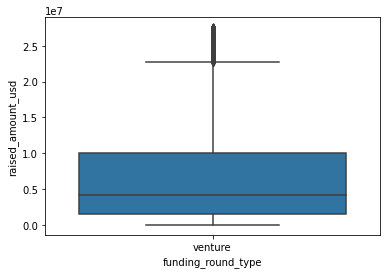

In [37]:
#Boxplot of funding type - venture after removal of outliers
sns.boxplot(data = df, x = 'funding_round_type', y = 'raised_amount_usd')
plt.show()

In [38]:
#Observation : Funding type Venture is the suitable one for spark funds to invest before and after the removal of outliers. 
#Not removing the outliers as we don't know the exact reason for the outliers
#Median value of the data without removing outliers : Representative Values of Investments for Each of these Funding Types
master_frame.groupby("funding_round_type")['raised_amount_usd'].median()

funding_round_type
angel               400000.0
private_equity    20000000.0
seed                275000.0
venture            5000000.0
Name: raised_amount_usd, dtype: float64

# Checkpoint 3: Country Analysis

In [39]:
#Creating new data frame with only venture as funding type
df_venture = master_frame[master_frame.funding_round_type == 'venture']
df_venture.shape

(50228, 7)

In [40]:
df_venture.head()

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,status,country_code
0,/organization/-fame,venture,10000000.0,#fame,Media,operating,IND
3,/organization/-the-one-of-them-inc-,venture,3406878.0,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,operating,NaN
4,/organization/0-6-com,venture,2000000.0,0-6.com,Curated Web,operating,CHN
8,/organization/0ndine-biomedical-inc,venture,719491.0,Ondine Biomedical Inc.,Biotechnology,operating,CAN
10,/organization/0xdata,venture,20000000.0,H2O.ai,Analytics,operating,USA


In [41]:
#top nine countries which have received the highest total funding on the funding type : venture
df_countries = df_venture.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending = False)
df_countries[0:9]

country_code
USA    4.225108e+11
CHN    3.983542e+10
GBR    2.024563e+10
IND    1.439186e+10
CAN    9.583332e+09
FRA    7.259537e+09
ISR    6.907515e+09
DEU    6.346960e+09
JPN    3.363677e+09
Name: raised_amount_usd, dtype: float64

In [42]:
#Creating list of top 9 counties names
countries_list = df_countries[0:9].index.to_list()
countries_list

['USA', 'CHN', 'GBR', 'IND', 'CAN', 'FRA', 'ISR', 'DEU', 'JPN']

In [43]:
#Creating 'top9' dataframe with the top nine countries which have received the highest total funding  
top9 = df_venture[df_venture.country_code.isin(countries_list)]
top9.shape

(44383, 7)

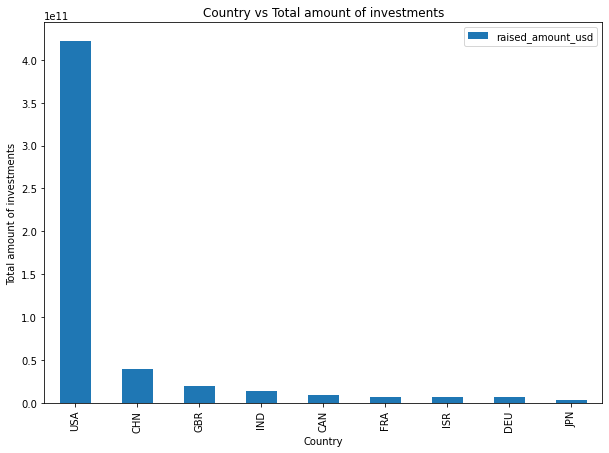

In [44]:
#top 9 countries against the total amount of investments of funding type venture in descending order
pivot = top9.pivot_table( index = 'country_code', values = 'raised_amount_usd', aggfunc = np.sum).sort_values('raised_amount_usd', ascending = False)
pivot.plot(kind = 'bar', figsize = (10,7), xlabel = 'Country', ylabel = 'Total amount of investments', title = "Country vs Total amount of investments")
plt.show()

In [45]:
#Observation : top three English-speaking countries in the data frame top9
#USA
#GBR
#IND

# Checkpoint 4: Sector Analysis 1

In [46]:
#Importing mapping.csv file into new dataframe
mapping = pd.read_csv('mapping.csv')
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [47]:
#Dropping the redundant column 'Blanks'
mapping.drop('Blanks', axis = 1, inplace = True)
mapping.head()

,category_list,Automotive & Sports,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,0,0,0,0,0,0,0
1,3D,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,1


In [48]:
#Separating the value variables from the mappings dataframe and forming a lsit
value_vars = list(mapping.columns[1:])
value_vars

['Automotive & Sports',
 'Cleantech / Semiconductors',
 'Entertainment',
 'Health',
 'Manufacturing',
 'News, Search and Messaging',
 'Others',
 'Social, Finance, Analytics, Advertising']

In [49]:
# Transforming the wide dataframe into long dataframe by using melt method
long_mapping = pd.melt(mapping, id_vars = ['category_list'], value_vars = value_vars)
long_mapping

,category_list,variable,value
0,NaN,Automotive & Sports,0
1,3D,Automotive & Sports,0
2,3D Printing,Automotive & Sports,0
3,3D Technology,Automotive & Sports,0
4,Accounting,Automotive & Sports,0
...,...,...,...
5499,Wholesale,"Social, Finance, Analytics, Advertising",0
5500,Wine And Spirits,"Social, Finance, Analytics, Advertising",0
5501,Wireless,"Social, Finance, Analytics, Advertising",0
5502,Women,"Social, Finance, Analytics, Advertising",0


In [50]:
#Filtering the data for correct mappings by removing zero values in the data
long_mapping = long_mapping[~(long_mapping.value == 0)]
long_mapping

,category_list,variable,value
8,Adventure Travel,Automotive & Sports,1
14,Aerospace,Automotive & Sports,1
45,Auto,Automotive & Sports,1
46,Automated Kiosk,Automotive & Sports,1
47,Automotive,Automotive & Sports,1
...,...,...,...
5433,Social Recruiting,"Social, Finance, Analytics, Advertising",1
5434,Social Television,"Social, Finance, Analytics, Advertising",1
5435,Social Travel,"Social, Finance, Analytics, Advertising",1
5446,Stock Exchanges,"Social, Finance, Analytics, Advertising",1


In [51]:
#Dropping the value column and renaming the variable column to main_sector
long_mapping = long_mapping.drop('value', axis = 1)
long_mapping = long_mapping.rename(columns = {'variable' : 'main_sector'})
long_mapping

,category_list,main_sector
8,Adventure Travel,Automotive & Sports
14,Aerospace,Automotive & Sports
45,Auto,Automotive & Sports
46,Automated Kiosk,Automotive & Sports
47,Automotive,Automotive & Sports
...,...,...
5433,Social Recruiting,"Social, Finance, Analytics, Advertising"
5434,Social Television,"Social, Finance, Analytics, Advertising"
5435,Social Travel,"Social, Finance, Analytics, Advertising"
5446,Stock Exchanges,"Social, Finance, Analytics, Advertising"


In [52]:
#Removing the rows with null values in category_list column in top9 dataframe
top9 = top9[~(top9.category_list.isna())]
top9.shape

(44118, 7)

In [53]:
#Extract the primary sector of each category list from the category_list column
top9.category_list = top9.category_list.apply(lambda x : x.split("|",1)[0])
top9.sample(10)

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,status,country_code
19218,/organization/chiasma,venture,38500000.0,Chiasma,Biotechnology,ipo,ISR
13525,/organization/bluearc,venture,72000000.0,BlueArc,Web Hosting,acquired,USA
20923,/organization/cloud-engines,venture,15000000.0,Cloud Engines,Enterprise Software,operating,USA
1954,/organization/active-endpoints,venture,6000000.0,Active Endpoints,Enterprise Software,operating,USA
112474,/organization/xueersi,venture,40000000.0,Xueersi,Education,operating,CHN
76449,/organization/plc-systems,venture,4040000.0,PLC Systems,Health Care,operating,USA
75562,/organization/pingmd,venture,412300.0,PingMD,Health and Wellness,operating,USA
18617,/organization/cerimon-pharmaceuticals,venture,1000000.0,Cerimon Pharmaceuticals,Biotechnology,operating,USA
99574,/organization/the-hitch,venture,50000.0,The Hitch,Business Analytics,operating,USA
103628,/organization/turing-pharmaceuticals,venture,90000000.0,Turing Pharmaceuticals,Biotechnology,operating,USA


In [54]:
#merged data frame with each primary sector mapped to its main sector
df_final_mapping = pd.merge(top9, long_mapping, how = 'left', on = 'category_list')
df_final_mapping.head()

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,status,country_code,main_sector
0,/organization/-fame,venture,10000000.0,#fame,Media,operating,IND,Entertainment
1,/organization/0-6-com,venture,2000000.0,0-6.com,Curated Web,operating,CHN,"News, Search and Messaging"
2,/organization/0ndine-biomedical-inc,venture,719491.0,Ondine Biomedical Inc.,Biotechnology,operating,CAN,Cleantech / Semiconductors
3,/organization/0xdata,venture,20000000.0,H2O.ai,Analytics,operating,USA,NaN
4,/organization/0xdata,venture,1700000.0,H2O.ai,Analytics,operating,USA,NaN


# Checkpoint 5: Sector Analysis 2

In [55]:
#Taking rows whose investment amount is falling within the 5-15 million USD range
df_final_mapping = df_final_mapping[df_final_mapping.raised_amount_usd.between(5000000, 15000000, inclusive=True)]

#Removing rows with null values in main_sector column in the merged dataframe
df_final_mapping = df_final_mapping[~(df_final_mapping.main_sector.isna())]

#Filtering the data using top 3 English speaking countries with highest investment amount
df_final_mapping = df_final_mapping[df_final_mapping.country_code.isin(['USA', 'GBR', 'IND'])]

df_final_mapping

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,status,country_code,main_sector
0,/organization/-fame,venture,10000000.0,#fame,Media,operating,IND,Entertainment
6,/organization/1-mainstream,venture,5000000.0,1 Mainstream,Apps,acquired,USA,"News, Search and Messaging"
28,/organization/128-technology,venture,11999347.0,128 Technology,Service Providers,operating,USA,Others
31,/organization/1366-technologies,venture,15000000.0,1366 Technologies,Manufacturing,operating,USA,Manufacturing
32,/organization/1366-technologies,venture,5000000.0,1366 Technologies,Manufacturing,operating,USA,Manufacturing
...,...,...,...,...,...,...,...,...
44108,/organization/zynga,venture,5026000.0,Zynga,Facebook Applications,ipo,USA,"Social, Finance, Analytics, Advertising"
44110,/organization/zynstra,venture,8400000.0,Zynstra,Software,operating,GBR,Others
44112,/organization/zyomyx-inc,venture,12000000.0,ZYOMYX,Biotechnology,operating,USA,Cleantech / Semiconductors
44113,/organization/zyomyx-inc,venture,14219999.0,ZYOMYX,Biotechnology,operating,USA,Cleantech / Semiconductors


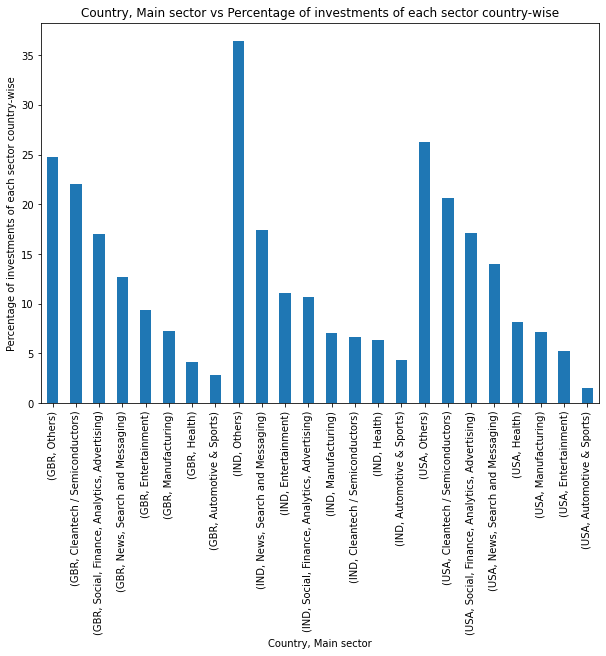

In [56]:
#Bar plot showing the number of investments in the all 8 sectors of the top 3 countries : Normalised data
final_plot = df_final_mapping.groupby(['country_code'])['main_sector'].value_counts(normalize=True)*100
final_plot.plot(kind = 'bar', figsize = (10,7), xlabel = 'Country, Main sector', ylabel = 'Percentage of investments of each sector country-wise', 
               title = 'Country, Main sector vs Percentage of investments of each sector country-wise')
plt.show()

In [57]:
#Creating individual data frames D1, D2 and D3 for top 3 English speaking countries with highest investment amount
D1 = df_final_mapping[df_final_mapping.country_code == 'USA']
D2 = df_final_mapping[df_final_mapping.country_code == 'GBR']
D3 = df_final_mapping[df_final_mapping.country_code == 'IND']

In [58]:
#Total number of investments in each data frame country wise
print(D1.shape, D2.shape, D3.shape)

(11149, 8) (577, 8) (299, 8)


In [59]:
#Total amount of investment (USD) country wise
print(D1.raised_amount_usd.sum(), D2.raised_amount_usd.sum(), D3.raised_amount_usd.sum())

99661524549.0 5028704358.0 2683537552.0


In [60]:
#Number of investments sector wise in USA in descending order
D1.main_sector.value_counts()

Others                                     2923
Cleantech / Semiconductors                 2297
Social, Finance, Analytics, Advertising    1912
News, Search and Messaging                 1563
Health                                      908
Manufacturing                               799
Entertainment                               580
Automotive & Sports                         167
Name: main_sector, dtype: int64

In [61]:
#Number of investments sector wise in GBR in descending order
D2.main_sector.value_counts()

Others                                     143
Cleantech / Semiconductors                 127
Social, Finance, Analytics, Advertising     98
News, Search and Messaging                  73
Entertainment                               54
Manufacturing                               42
Health                                      24
Automotive & Sports                         16
Name: main_sector, dtype: int64

In [62]:
#Number of investments sector wise in IND in descending order
D3.main_sector.value_counts()

Others                                     109
News, Search and Messaging                  52
Entertainment                               33
Social, Finance, Analytics, Advertising     32
Manufacturing                               21
Cleantech / Semiconductors                  20
Health                                      19
Automotive & Sports                         13
Name: main_sector, dtype: int64

In [63]:
#Total amount of investment sector wise in USA in ascending order
D1.groupby("main_sector")['raised_amount_usd'].sum().sort_values()

main_sector
Automotive & Sports                        1.454104e+09
Entertainment                              5.000213e+09
Manufacturing                              7.258553e+09
Health                                     8.200859e+09
News, Search and Messaging                 1.379682e+10
Social, Finance, Analytics, Advertising    1.668070e+10
Cleantech / Semiconductors                 2.118100e+10
Others                                     2.608928e+10
Name: raised_amount_usd, dtype: float64

In [64]:
#Total amount of investment sector wise in GBR in ascending order
D2.groupby("main_sector")['raised_amount_usd'].sum().sort_values()

main_sector
Automotive & Sports                        1.670516e+08
Health                                     2.145375e+08
Manufacturing                              3.619403e+08
Entertainment                              4.615111e+08
News, Search and Messaging                 6.157462e+08
Social, Finance, Analytics, Advertising    8.218884e+08
Cleantech / Semiconductors                 1.136905e+09
Others                                     1.249124e+09
Name: raised_amount_usd, dtype: float64

In [65]:
#Total amount of investment sector wise in IND in ascending order
D3.groupby("main_sector")['raised_amount_usd'].sum().sort_values()

main_sector
Automotive & Sports                        1.369000e+08
Cleantech / Semiconductors                 1.653800e+08
Health                                     1.677400e+08
Manufacturing                              2.009000e+08
Entertainment                              2.808300e+08
Social, Finance, Analytics, Advertising    2.905435e+08
News, Search and Messaging                 4.338345e+08
Others                                     1.007410e+09
Name: raised_amount_usd, dtype: float64

In [66]:
#Total investment in each company in Others sector in USA in ascending order
D1[D1.main_sector == 'Others'].groupby('company_permalink')['raised_amount_usd'].sum().sort_values()

company_permalink
/organization/urban-remedy              5000000.0
/organization/pet-s-choice              5000000.0
/organization/victrio                   5000000.0
/organization/iridian-technologies      5000000.0
/organization/sanpulse-technologies     5000000.0
                                          ...    
/organization/black-duck-software      51000000.0
/organization/decarta                  52100000.0
/organization/airtight-networks        54201907.0
/organization/capella                  54968051.0
/organization/virtustream              64300000.0
Name: raised_amount_usd, Length: 2030, dtype: float64

In [67]:
#Total investment in each company in Others sector in GBR in ascending order
D2[D2.main_sector == 'Others'].groupby('company_permalink')['raised_amount_usd'].sum().sort_values()

company_permalink
/organization/bullguard                   5000000.0
/organization/bacula-systems              5000000.0
/organization/udex                        5000000.0
/organization/photobox                    5000000.0
/organization/vector-watch                5000000.0
                                            ...    
/organization/opencloud                  27972766.0
/organization/silverrail-technologies    29000000.0
/organization/enigmatic                  32500000.0
/organization/sensage                    36250000.0
/organization/electric-cloud             37000000.0
Name: raised_amount_usd, Length: 117, dtype: float64

In [68]:
#Total investment in each company in Others sector in IND in ascending order
D3[D3.main_sector == 'Others'].groupby('company_permalink')['raised_amount_usd'].sum().sort_values()

company_permalink
/organization/liases-foras            5000000.0
/organization/vedantu-innovations     5000000.0
/organization/voonik-com              5000000.0
/organization/reznext                 5000000.0
/organization/tastykhana              5000000.0
                                        ...    
/organization/itzcash-card-ltd       25000000.0
/organization/pepperfry-com          28000000.0
/organization/commonfloor            32900000.0
/organization/myntra                 38000000.0
/organization/firstcry-com           39000000.0
Name: raised_amount_usd, Length: 87, dtype: float64

In [69]:
#Total investment in each company in Cleantech / Semiconductors sector in USA in ascending order
D1[D1.main_sector == 'Cleantech / Semiconductors'].groupby('company_permalink')['raised_amount_usd'].sum().sort_values()

company_permalink
/organization/1bog                    5000000.0
/organization/hadron-systems          5000000.0
/organization/benchling               5000000.0
/organization/gt-urological           5000000.0
/organization/azuray-technologies     5000000.0
                                        ...    
/organization/scienergy              55375423.0
/organization/rheonix                56124758.0
/organization/forsight-labs          61300001.0
/organization/tigo-energy            68739496.0
/organization/biodesix               75300000.0
Name: raised_amount_usd, Length: 1582, dtype: float64

In [70]:
#Total investment in each company in Cleantech / Semiconductors sector in GBR in ascending order
D2[D2.main_sector == 'Cleantech / Semiconductors'].groupby('company_permalink')['raised_amount_usd'].sum().sort_values()

company_permalink
/organization/exco-intouch                                                      5000000.0
/organization/ignis-energy                                                      5014644.0
/organization/flowline                                                          5104587.0
/organization/mmic-solutions                                                    5250000.0
/organization/lamellar-biomedical                                               5301059.0
                                                                                  ...    
/organization/takeda-cambridge                                                 22340000.0
/organization/elixent                                                          25000000.0
/organization/f-star-biotechnologische-forschungs-und-entwicklungsges-m-b-h    29132906.0
/organization/horizon-discovery                                                31353719.0
/organization/eusa-pharma                                                      356

In [71]:
#Total investment in each company in News, Search and Messaging sector in IND in ascending order
D3[D3.main_sector == 'News, Search and Messaging'].groupby('company_permalink')['raised_amount_usd'].sum().sort_values()

company_permalink
/organization/mobikwik                             5000000.0
/organization/wooplr                               5000000.0
/organization/reviews42                            5000000.0
/organization/localoye                             5000000.0
/organization/localbanya                           5000000.0
/organization/jugnoo                               5000000.0
/organization/zoomo                                5000000.0
/organization/chakpak-media                        5000000.0
/organization/belong                               5000000.0
/organization/easylink                             5400000.0
/organization/the-porter                           5500000.0
/organization/surewaves                            5700000.0
/organization/chillr-2                             6000000.0
/organization/zinka-logistics                      6000000.0
/organization/redbus-in                            6428770.0
/organization/knowlarity-communications            6500000.0
/organ

# Checkpoint 6: Plots

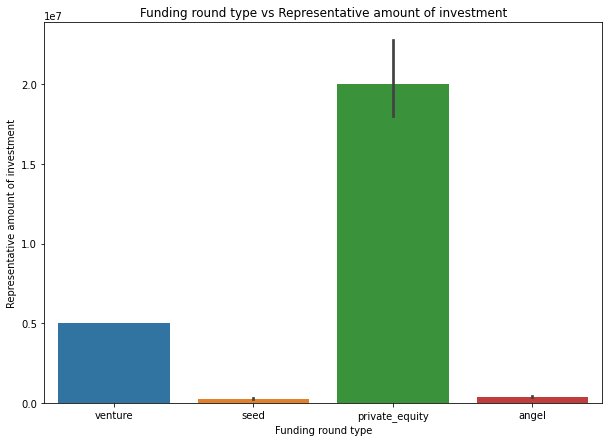

In [72]:
#1)plot showing the representative amount of investment in each funding type
plt.figure(figsize= (10,7))
ax = sns.barplot(data = master_frame, x = 'funding_round_type', y = 'raised_amount_usd', estimator = np.median)
ax.set(xlabel='Funding round type', ylabel='Representative amount of investment', title = 'Funding round type vs Representative amount of investment')
plt.show()

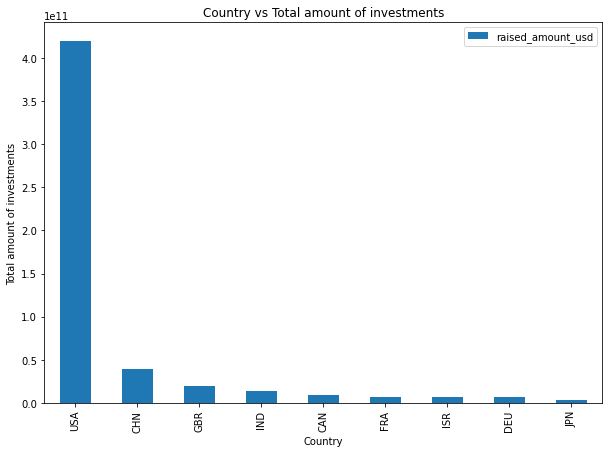

In [73]:
#2)top 9 countries against the total amount of investments of funding type venture in descending order
pivot = top9.pivot_table( index = 'country_code', values = 'raised_amount_usd', aggfunc = np.sum).sort_values('raised_amount_usd', ascending = False)
pivot.plot(kind = 'bar', figsize = (10,7), xlabel = 'Country', ylabel = 'Total amount of investments', title = "Country vs Total amount of investments")
plt.show()

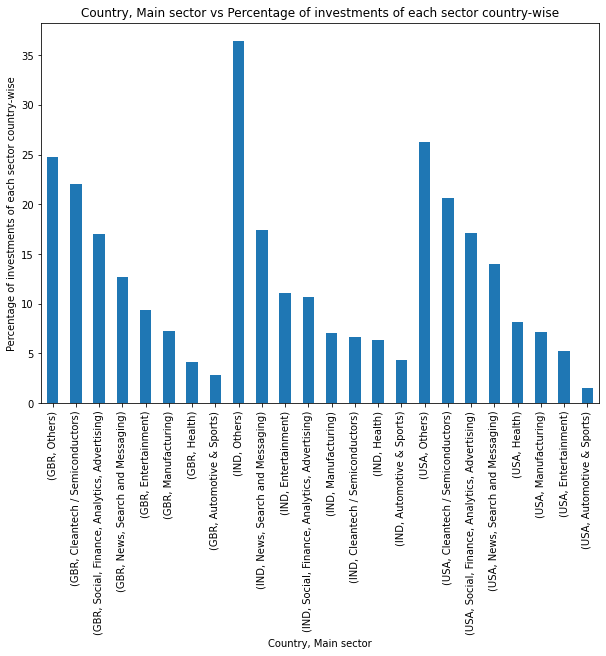

In [74]:
#3)Bar plot showing the number of investments in the all 8 sectors of the top 3 countries : Normalised data
final_plot = df_final_mapping.groupby(['country_code'])['main_sector'].value_counts(normalize=True)*100
final_plot.plot(kind = 'bar', figsize = (10,7), xlabel = 'Country, Main sector', ylabel = 'Percentage of investments of each sector country-wise', 
               title = 'Country, Main sector vs Percentage of investments of each sector country-wise')
plt.show()